In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [53]:
df_train_stops = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')

In [3]:
df_train_stops.head()

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575


In [23]:
len(df_train_stops['Stop Name'].unique())

376

### Making a df from turnstile data

In [24]:
dates = ['170624', '170617', '170610', '170603', '170527', '170520', '170513', '170506', '160625', '160618', '160611', '160604', '160528', '160521', '160514', '160507']

chronological_dates = list(reversed(dates))

In [25]:
turnstile_df = pd.DataFrame()

for date in chronological_dates:
    base = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_'
    url = base + date + '.txt'
    print(url)
    df = pd.read_csv(url)
    turnstile_df = pd.concat([turnstile_df, df], ignore_index=True)

http://web.mta.info/developers/data/nyct/turnstile/turnstile_160507.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160514.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160521.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160528.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160604.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160611.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160618.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160625.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170506.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170513.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170520.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170527.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170603.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170

In [7]:
turnstile_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197


In [26]:
len(turnstile_df['STATION'].unique())

380

In [27]:
for item in turnstile_df['STATION'].str.lower().unique():
    if item not in df_train_stops['Stop Name'].str.lower().unique():
        print(item)

57 st-7 av
times sq-42 st
34 st-herald sq
14 st-union sq
8 st-nyu
whitehall s-fry
delancey/essex
park place
beverley road
jay st-metrotec
atl av-barclay
4av-9 st
ft hamilton pky
coney is-stillw
w 8 st-aquarium
myrtle-wyckoff
bushwick av
new lots
east 105 st
canarsie-rockaw
howard bch jfk
jfk jamaica ct1
75 st-elderts
85 st-forest pk
knickerbocker
seneca ave
forest ave
inwood-207 st
163 st-amsterdm
81 st-museum
59 st columbus
42 st-port auth
34 st-penn sta
w 4 st-wash sq
world trade ctr
hoyt-scher
clinton-wash av
kingston-throop
van siclen ave
ozone pk leffrt
aqueduct n.cond
aqueduct racetr
rockaway park b
far rockaway
161/yankee stad
bedford pk blvd
norwood 205 st
lexington av/53
court sq-23 st
jksn ht-roosvlt
grand-newtown
63 dr-rego park
forest hills 71
kew gardens
briarwood
jamaica 179 st
nassau st
myrtle-willough
bedford-nostran
47-50 sts rock
42 st-bryant pk
b'way-lafayette
smith-9 st
4 av-9 st
15 st-prospect
lexington av/63
roosevelt islnd
21 st-qnsbridge
jamaica van wk
sutphin-a

In [28]:
turnstile_df[turnstile_df['STATION'].str.lower() == 'st. george']

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
192645,S101,R070,00-00-00,ST. GEORGE,1,SRT,04/30/2016,00:00:00,REGULAR,859377,158
192646,S101,R070,00-00-00,ST. GEORGE,1,SRT,04/30/2016,04:00:00,REGULAR,859379,158
192647,S101,R070,00-00-00,ST. GEORGE,1,SRT,04/30/2016,08:00:00,REGULAR,859399,158
192648,S101,R070,00-00-00,ST. GEORGE,1,SRT,04/30/2016,12:00:00,REGULAR,859433,158
192649,S101,R070,00-00-00,ST. GEORGE,1,SRT,04/30/2016,16:00:00,REGULAR,859468,158
192650,S101,R070,00-00-00,ST. GEORGE,1,SRT,04/30/2016,20:00:00,REGULAR,859496,158
192651,S101,R070,00-00-00,ST. GEORGE,1,SRT,05/01/2016,00:00:00,REGULAR,859509,158
192652,S101,R070,00-00-00,ST. GEORGE,1,SRT,05/01/2016,04:00:00,REGULAR,859509,158
192653,S101,R070,00-00-00,ST. GEORGE,1,SRT,05/01/2016,07:21:51,REGULAR,859526,158
192654,S101,R070,00-00-00,ST. GEORGE,1,SRT,05/01/2016,08:00:00,REGULAR,859534,158


In [29]:
df_train_stops[df_train_stops['Stop Name'].str.lower().contains('norwood')]

AttributeError: 'Series' object has no attribute 'contains'

In [167]:
df_SS = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170916.txt')
                 #http://web.mta.info/developers/data/nyct/subway/StationEntrances.csv')


In [168]:
col_names = turnstile_df.columns
turnstile_df.rename(columns = {turnstile_df.columns[-1]:'EXITS'}, inplace=True)
df_SS.rename(columns = {df_SS.columns[-1]:'EXITS'}, inplace=True) 

In [ ]:
#can do groupby agg ant then specify what to do to each col. 

In [265]:
#turnstile_int.ID.value_counts()

In [249]:
#stns = (day1['STATION'].unique())
#stns

In [248]:
#day1.loc[(day1.LINENAME==lins[4])]#&(day1.STATION=='TIMES SQ-42 ST'),:]

28546

In [247]:
#day1.STATION.unique()

In [173]:
df.groupby[]

SyntaxError: invalid syntax (<ipython-input-173-f710c33f7e1e>, line 1)

### Get and Compute the total number of people in and out of each station, each day.

In [276]:
def ppl_per_day_turnst(datafrm, dt_start='06/09/2016'):  #, dt_end):#dt_start,dt_end,

    """function to subtract the entries and exits collected at the starting hour for the day (i.e., 00:00:00 hrs) from the entries 
    and exits collected during the next collection time (i.e. 04:00:00 hrs) for each turnstile.
    ----------
    dt_start = list start day as string in format mm/dd/yyyy  
    dt_end = end day as string in format mm/dd/yyyy
    datafrm= dataframe from MTA turnstile data"""
    #dt = dt_start # needs to loop through a range, for later for summer to fix
    #if # find the hours for each row (TIME) and put into a list, then get max and min  & (datafrm.TIME == '00:00:00'), :])
    from datetime import datetime
    #val = '2013-01-09 06:13:51,464'.split(',')[0]  # Remove milliseconds
    date_ob_st = datetime.strptime(dt_start, '%m/%d/%Y')
    #date_ob = datetime.strptime(val, '%Y-%m-%d %H:%M:%S')
    wkday = date_ob_st.weekday()
    day1 = datafrm.loc[(datafrm.DATE == dt_start ),['DATE','STATION','LINENAME','SCP','TIME','ENTRIES','EXITS']]
    lins = (day1['LINENAME'].unique())
    stns = (day1['STATION'].unique())
    turnstile_int = pd.DataFrame(index=range(len(datafrm)),columns=['DATE','STATION','LINENAME','ID','HOUR','ENTRIES','EXITS','WEEKDAY'])
    rowDF = 0 
    for ln in lins :
        lines = pd.DataFrame(columns=day1.columns)
        lines = day1.loc[(day1.LINENAME==ln)]
        for stn in stns:
            st = pd.DataFrame(columns=lines.columns)
            st = lines.loc[(day1.STATION==stn)]
            turnstiles = st['SCP'].unique()
            for turnstile in turnstiles:
                turnstile_data = pd.DataFrame(columns=st.columns)
                turnstile_data = st.loc[(st.SCP==turnstile)] 
                for row in range(len(turnstile_data)-1) :
                    # if datetime.strptime(turnstile_data.TIME.iloc[row], '%H:%M:%S') < datetime.strptime(turnstile_data.TIME.iloc[row+1], '%H:%M:%S'):               
                        turnstile_int.ENTRIES.iloc[rowDF] = int(turnstile_data.ENTRIES.iloc[row+1]) - int(turnstile_data.ENTRIES.iloc[row])  #subtract numb from start of day from end of day for each turnstyle
                        turnstile_int.EXITS.iloc[rowDF] = int(turnstile_data.EXITS.iloc[row+1]) - int(turnstile_data.EXITS.iloc[row])  #subtract numb from start of day from end of day for each turnstyle
                        turnstile_int.DATE.iloc[rowDF] = turnstile_data.DATE.iloc[row]
                        turnstile_int.STATION.iloc[rowDF] = turnstile_data.STATION.iloc[row]
                        turnstile_int.ID.iloc[rowDF] = turnstile_data.SCP.iloc[row]
                        turnstile_int.LINENAME.iloc[rowDF] = turnstile_data.LINENAME.iloc[row]
                        turnstile_int.HOUR.iloc[rowDF] = turnstile_data.TIME.iloc[row+1]
                        turnstile_int.WEEKDAY.iloc[rowDF] = wkday
                        rowDF = rowDF + 1 
    return turnstile_int

In [278]:
import pickle
path = '/Users/ada/Dropbox/metis/MTA/pkl_files/'

shinyhappypeople = ppl_per_day_turnst(df_SS, '09/15/2017')
shinyhappypeople


,DATE,STATION,LINENAME,ID,HOUR,ENTRIES,EXITS,WEEKDAY
0,09/15/2017,59 ST,NQR456W,02-00-00,04:00:00,27,6,4
1,09/15/2017,59 ST,NQR456W,02-00-00,08:00:00,39,114,4
2,09/15/2017,59 ST,NQR456W,02-00-00,12:00:00,141,247,4
3,09/15/2017,59 ST,NQR456W,02-00-00,16:00:00,326,67,4
4,09/15/2017,59 ST,NQR456W,02-00-00,20:00:00,765,64,4
5,09/15/2017,59 ST,NQR456W,02-00-01,04:00:00,12,4,4
6,09/15/2017,59 ST,NQR456W,02-00-01,08:00:00,22,47,4
7,09/15/2017,59 ST,NQR456W,02-00-01,12:00:00,110,138,4
8,09/15/2017,59 ST,NQR456W,02-00-01,16:00:00,223,50,4
9,09/15/2017,59 ST,NQR456W,02-00-01,20:00:00,630,47,4


In [128]:
dd = ppl_per_day_turnst(turnstile_df)
dd.head(207)

,DATE,STATION,ID,tENTRIES,tEXITS
0,06/09/2016,59 ST,02-00-00,1523,506
1,06/09/2016,59 ST,02-00-01,1302,301
2,06/09/2016,59 ST,02-03-00,498,2420
3,06/09/2016,59 ST,02-03-01,1201,2388
4,06/09/2016,59 ST,02-03-02,1283,2177
5,06/09/2016,59 ST,02-03-03,1317,1575
6,06/09/2016,59 ST,02-03-04,1709,787
7,06/09/2016,59 ST,02-03-05,2575,170
8,06/09/2016,59 ST,02-03-06,2228,36
9,06/09/2016,59 ST,02-05-00,0,0


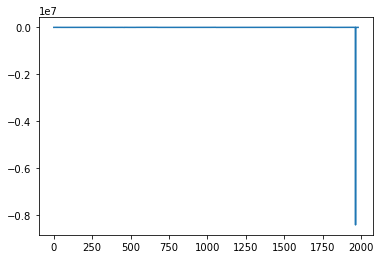

In [99]:
.plot(dd.tENTRIES)